In [1]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga.csv"

In [2]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','cleaned']]
docs.columns = ['LGA','cleaned']
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,tranquility in the park moore park inn boutiqu...
2,Ballina,happy new year to all my pals back home in the...
3,Balranald,crackin night on the river just posted photo o...
4,Bathurst Regional,happy new year to you your fam as well miss mi...
5,Bayside,wtf is maths circus sounds like it must've bee...
6,Bega Valley,suns out guns out coffee time #crossfitgirls #...
7,Bellingen,more from the promised lands #normanheywood #l...
8,Berrigan,hottt appreciate your hotness monique it's 201...
9,Blacktown,ahhh tumblr currently have hammock in the livi...


In [3]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=5000,
    stop_words='english',
    token_pattern=None)  

In [4]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

#Return top features amongst documents in rows indentified by indices in grp_ids
def top_mean_feats(tfs, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = tfs[grp_ids].toarray()
    else:
        D = tfs.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [5]:
target_df = pd.read_csv(input_filepath+"filtered_nonlog_target.csv").iloc[:,1:]
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [6]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,tranquility in the park moore park inn boutiqu...
2,Ballina,happy new year to all my pals back home in the...
3,Bathurst Regional,happy new year to you your fam as well miss mi...
4,Bayside,wtf is maths circus sounds like it must've bee...
5,Bega Valley,suns out guns out coffee time #crossfitgirls #...
6,Bellingen,more from the promised lands #normanheywood #l...
7,Berrigan,hottt appreciate your hotness monique it's 201...
8,Blacktown,ahhh tumblr currently have hammock in the livi...
9,Bland,weethalle #farm #country #rural #reddirt #suns...


In [10]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [11]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=lambda x: np.abs(importants.get(x)), reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

Try increasing max features to test the boundaries of where overfitting begins...

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 541.7183213490061 seconds
MOST IMPORTANT FEATURES:
grass 0.0829653366676
sydney 0.0802408653245
old 0.0586272928342
nsw 0.0353604418959
dec 0.0315153007976
❤ 0.0303007780289
nov 0.0276389678575
nov 2016 0.0227292155595
post 0.0212889924106
look 0.0211798065505
week 0.021011558313
great 0.0196850889741
amaz 0.0190350211356
#auspol 0.0186572314316
#nswfire 0.0184820728023
lol 0.0181031015258
oh 0.0166153544957
love 0.0155016771406
dec 2016 0.0152994519572
did 0.0139543399109
R2: -0.10362862935
RMSE: 308.102025109
MAPE: 70.1374917419
Mean APE Baseline: 72.0914035637


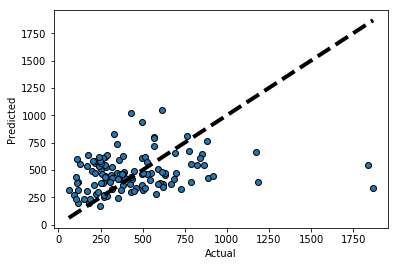

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 538.8005394830834 seconds
MOST IMPORTANT FEATURES:
st 0.209641959119
sydney 0.0385408051589
#sydney 0.0359334067111
#grassfir #nswfire 0.0352800081303
just post photo 0.0345869342603
#nswfire 0.0305620281401
just post 0.0252600488755
#bushfir #nswfire advic 0.0224006960507
hwi 0.0217122852214
past 0.0169410843566
park 0.0164712814838
read 0.015152908525
dec 2016 0.0139857292995
#grassfir 0.0133197098997
creek 0.0120037093506
grass 0.0109172011517
just 0.010371184158
👍 0.0101314295061
nsw 0.00929467676858
hear 0.00867218771416
R2: 0.0288341154694
RMSE: 289.021255214
MAPE: 63.57454773
Mean APE Baseline: 72.0914035637


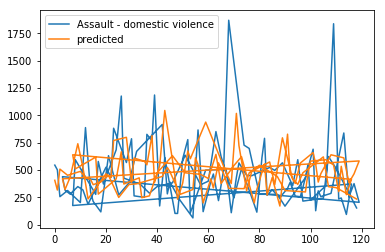

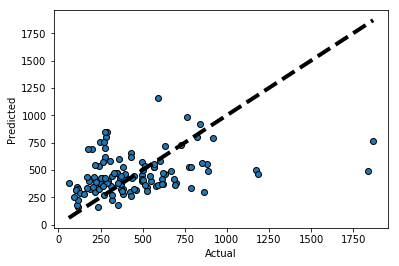

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 540.9545899759978 seconds
MOST IMPORTANT FEATURES:
92 0.107161397822
st 0.0582259306535
#sydney 0.0324270686564
nsw 0.0294437891335
km 0.0214532708775
#nswrf #bushfir #nswfire 0.0203438732215
anna 0.0190118576328
55 0.0170142685618
nut 0.017001690389
score 0.0169331977558
just post 0.0167969921857
sydney 0.0167446999464
broken hill 0.0146185320252
plain 0.0145026173989
nov 0.0139350468684
14 dec 0.0138226329792
queen 0.0128683461841
#grassfir advic grass 0.0125158964336
#dubbo 0.0123341920339
😍 0.0123017432426
R2: 0.0736940182245
RMSE: 282.26713042
MAPE: 66.7216558961
Mean APE Baseline: 72.0914035637


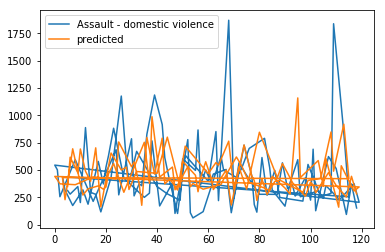

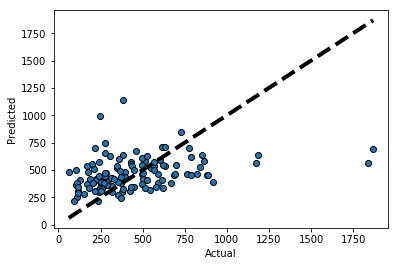

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 543.3102147458121 seconds
MOST IMPORTANT FEATURES:
#nswfire grass 0.0667699400114
sydney 0.0398689937536
#grassfir 0.0293766755068
heat 0.0293690328329
92 0.024645919076
14 dec 0.0230848760556
plant 0.0230211736818
crop 0.0213053464005
gwydir 0.0212890371604
#dubbo 0.021207276734
nsw 0.0203416596446
beat 0.0172005395703
tattoo 0.0171575405735
st 0.0157022526379
😂 0.0144585208735
30 oct 0.0137936610802
grey 0.0133662696163
farm 0.0127504591902
#structurefir #nswfire 0.0122266412994
#bushfir #nswfire advic 0.0122050535834
R2: 0.00739466904584
RMSE: 292.194055013
MAPE: 72.9136544899
Mean APE Baseline: 72.0914035637


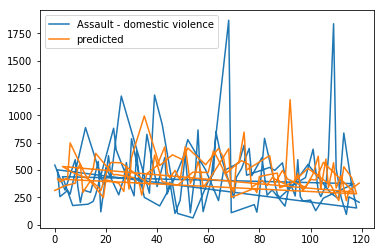

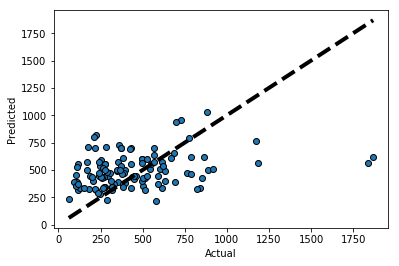

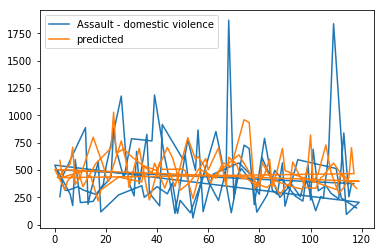

In [14]:
for f in [200,500,2000,5000]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','Assault - domestic violence']], max_features=f, folds=3)
    end = timer()
    print('Finished TF-IDF 3 fold cross validation in',end-start,'seconds')
    tfidf_metrics(predictions, importants)
    # Just do a default pandas plot as well...
    predictions.plot()

Max features 500 is superior so we will stick with that. Now run an analysis on all 6 target variables:

Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 927.2232474978082 seconds
MOST IMPORTANT FEATURES:
st 0.164171597271
sydney 0.0594406670205
#grassfir 0.055220860033
hwi 0.0307016733694
street 0.0300886412529
#grassfir #nswfire 0.0293076164974
nsw 0.0224466977059
grass 0.0212821254203
light 0.0205287646545
hous 0.019389511957
#sydney 0.0179310841471
mountain 0.0148434397131
#nsw 0.0121160430673
way 0.0115366988661
central 0.0100948617861
dec 0.00988041738239
just post 0.00908945316225
#newcastl 0.00806241570789
2016 0.00727902640148
omg 0.00703013753116
R2: 0.0591658874374
RMSE: 284.472049478
MAPE: 63.7543961535
Mean APE Baseline: 72.0914035637


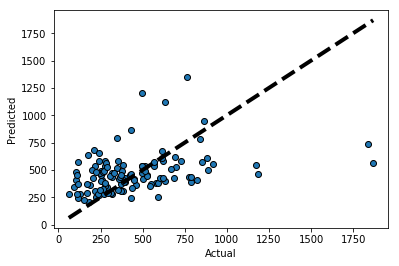

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 926.3321480718441 seconds
MOST IMPORTANT FEATURES:
sydney 0.114200090345
st 0.104048582263
light 0.0423971539963
#grassfir #nswfire 0.0292696477862
nsw 0.0272737514926
work 0.0210901183881
#sydney 0.0178565131682
open 0.0138862030991
cool 0.0130625279387
final 0.0121050179487
central 0.0108597433247
ne 0.0102969193121
make 0.00965405641689
#grassfir 0.00965127558366
idea 0.00954430129383
1.4 0.00919562283074
say 0.00791614234383
wow 0.00732958406944
#nsw 0.00728483123466
10 0.00722823426608
R2: -0.168608335084
RMSE: 262.80220657
MAPE: 67.4922366145
Mean APE Baseline: 59.8326771602


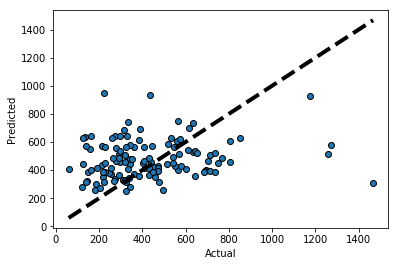

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 925.9549675190356 seconds
MOST IMPORTANT FEATURES:
ne 0.0729415720788
bu 0.0569269408197
work 0.0487352577466
talk 0.0438719622993
chang 0.0379733521369
celebr 0.0333345057743
tweet 0.023573245857
right 0.0209038765767
bridg 0.0169974877391
guy 0.0155040893877
#sydney 0.0151625800267
im 0.0150997613687
phone 0.0150010363112
se 0.013246159605
#nswrf 0.0131483705771
need 0.0129015833426
actual 0.0121309409908
mb 0.0118423780918
isn't 0.0115291903231
app 0.0105421662228
R2: 0.160246716639
RMSE: 265.021010872
MAPE: 45.0516852158
Mean APE Baseline: 50.564378615


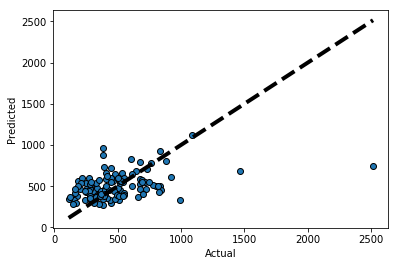

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 928.9088116709609 seconds
MOST IMPORTANT FEATURES:
#sydney 0.14404496913
sydney 0.0999005693819
st 0.0312040653321
#grassfir 0.0176399919399
hous 0.0163886015917
sep 2016 0.0143324044116
👍 0.0139150707637
😂 😂 😂 0.0131280436194
read 0.013007972657
drink 0.0125524902574
birthday 0.0123023687881
nice 0.0121111921361
amaz 0.0121071655246
pleas 0.0112120497699
#grassfir #nswfire 0.0108540516478
#nsw 0.0103636883675
nsw 0.0100614451717
lake 0.00983669217794
hwi 0.00970365744161
morn 0.00909758919532
R2: 0.166999253073
RMSE: 85.2006245808
MAPE: 44.7599211811
Mean APE Baseline: 53.0821806583


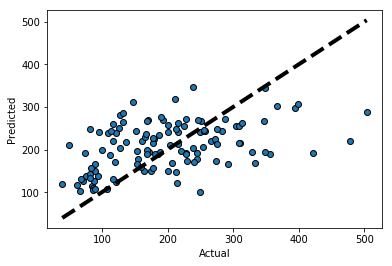

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 926.1265178290196 seconds
MOST IMPORTANT FEATURES:
st 0.161134044345
#sydney 0.0723256186963
sydney 0.0712321537473
#grassfir 0.0547162616278
hwi 0.0384275110724
grass 0.0268625858149
light 0.0230783395115
#grassfir #nswfire 0.0165760235383
dec 2016 0.0160628845159
#nswfire 0.0156703368941
❤ ❤ ❤ 0.0141455800434
#nsw 0.0125034548838
nov 0.0119840659932
😭 0.0118197372451
post photo 0.00997306845656
#australia 0.00967613605758
nov 2016 0.00955716142268
dog 0.00885506293172
1.4 0.00836249799601
hous 0.0075096354172
R2: -0.0161054503828
RMSE: 577.461998298
MAPE: 46.1514326678
Mean APE Baseline: 53.4238936165


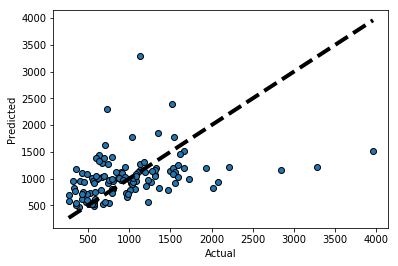

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 926.8123066900298 seconds
MOST IMPORTANT FEATURES:
#sydney 0.171390592601
st 0.104707652528
sydney 0.0953511687388
birthday 0.0410459838264
#grassfir #nswfire 0.0253245359858
hwi 0.0235823857749
god 0.0194066774974
beach 0.0185042118817
i'v 0.0157907514952
wish 0.0152815325606
dec 2016 0.0137778508158
#grassfir 0.0134749818906
nov 2016 0.0112340898543
plan 0.0112125017423
rock 0.0103486405948
#mvatransport 0.00812517180612
play 0.00805320522254
nsw 0.00714122041158
you'r 0.00706776307838
someon 0.0064706857058
R2: 0.370486429321
RMSE: 118.34946303
MAPE: 64.0549014728
Mean APE Baseline: 126.659859832


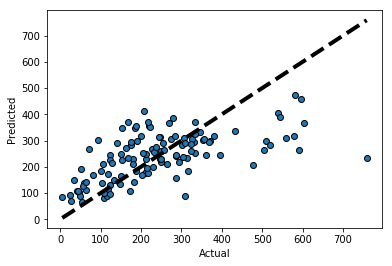

In [15]:
tfidf_output = pd.DataFrame()
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=500, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [16]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_2016_rfr_preds.csv",index=False)

In [22]:
# Redo using Lasso instead:
from sklearn import linear_model

def tfidf_cv(X, y, max_features=None, folds=5, alpha=0.1):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = linear_model.Lasso(alpha=alpha,random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.coef_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

/Users/richardnichol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Finished processing 30 records...
Finished processing 60 records...
Finished processing 90 records...
Finished processing 120 records...
Finished TF-IDF 4 fold cross validation in 756.150244976161 seconds
MOST IMPORTANT FEATURES:
#grassfir #nswfire 2432.17215207
st 2159.86674453
light 1852.17400652
post photo 1354.91729538
need 1353.32317501
hope 1261.64365914
thank 1148.35280315
grass 1010.220137
street 890.862325814
old 736.161203287
win 709.719575358
nsw 703.718356379
watch 697.020580214
i'm 684.187091457
#grassfir 677.984051016
bush clarenc 585.881655505
dec 2016 583.012226176
#bushfir #nswfire advic 546.690063257
#bushfir 538.30319725
nov 519.341344756
R2: -0.235007455707
RMSE: 325.925142123
MAPE: 78.4092517833
Mean APE Baseline: 72.0914035637


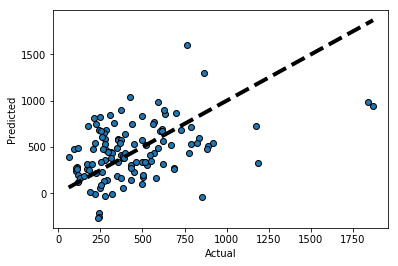

Finished processing 30 records...
Finished processing 60 records...
Finished processing 90 records...
Finished processing 120 records...
Finished TF-IDF 4 fold cross validation in 739.5869326221291 seconds
MOST IMPORTANT FEATURES:
st 1489.26841075
#grassfir #nswfire 1047.07888479
nsw 516.131481587
#grassfir 473.337465772
love 342.737332496
lol 287.229952243
hill 262.329179272
clarenc valley 179.654924891
dec 2016 176.072859769
advic bush 173.222955664
bush 125.687402328
i'm 121.872770177
#bushfir #nswfire advic 110.648278505
nov 2016 109.455268522
omg 104.229038665
#bushfir 90.6766971156
💜 90.1797515484
💗 💕 56.3599192069
❤ 53.686978549
wa 52.9249833944
R2: 0.241827964655
RMSE: 255.368281981
MAPE: 58.0139497184
Mean APE Baseline: 72.0914035637


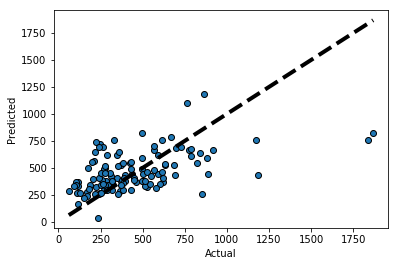

Finished processing 30 records...
Finished processing 60 records...
Finished processing 90 records...
Finished processing 120 records...
Finished TF-IDF 4 fold cross validation in 741.4810159679037 seconds
MOST IMPORTANT FEATURES:
nsw 564.468244309
😭 0.0
final 0.0
finish 0.0
follow 0.0
food 0.0
forward 0.0
free 0.0
friday 0.0
friend 0.0
fuck 0.0
fun 0.0
game 0.0
girl 0.0
god 0.0
gonna 0.0
favourit 0.0
good 0.0
gorgeou 0.0
got 0.0
R2: 0.147227115103
RMSE: 270.831868076
MAPE: 65.1570664617
Mean APE Baseline: 72.0914035637


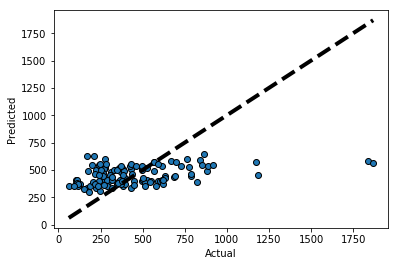

In [23]:
for a in [0.1,1,5]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','Assault - domestic violence']],
                                       max_features=500, folds=4, alpha=a)
    end = timer()
    print('Finished TF-IDF 4 fold cross validation in',end-start,'seconds')
    tfidf_metrics(predictions, importants)

Alpha of 1 is clearly the best choice, so try against all 6 targets:

MODEL=LASSO, MAX FEATURES=500, ALPHA=1
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 937.0812224401161 seconds
MOST IMPORTANT FEATURES:
st 1501.90755268
#grassfir #nswfire 1122.33181646
nsw 592.190893271
rd -479.57970895
love 387.443241865
#nswrf -379.623383595
grass 363.453727203
beach -282.570062006
hill 268.817829109
👍 -267.100796752
💜 245.352921019
clarenc valley 241.200355796
sep 2016 -234.67775077
bush 225.163753001
road -220.499362435
thi -218.525694388
#sydney -199.816639267
look -198.088347962
rock -191.005130745
dec 2016 186.781352591
R2: 0.204154625774
RMSE: 261.635952521
MAPE: 59.1748063645
Mean APE Baseline: 72.0914035637


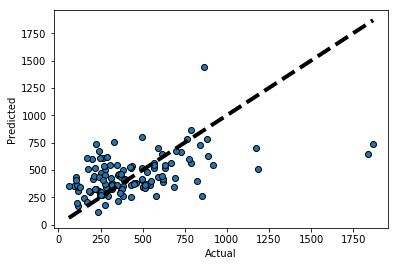

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 933.8114274521358 seconds
MOST IMPORTANT FEATURES:
st 1008.72411175
#grassfir #nswfire 846.517240893
#nswrf -600.839120715
grass 416.967389162
rock -286.269533343
advic bush 256.540574238
love 223.329673128
👍 -202.380426867
nsw 199.123021973
point -187.69027596
oct 2016 -186.630063942
dec 2016 165.205393677
byron 154.067894232
#sydney -135.446025483
hill 116.803105586
wind km 108.496672567
south -104.17429251
oct -92.7646998112
thi -87.1004699486
💜 86.8096842415
R2: 0.0784599198994
RMSE: 233.373549595
MAPE: 56.6652447478
Mean APE Baseline: 59.8326771602


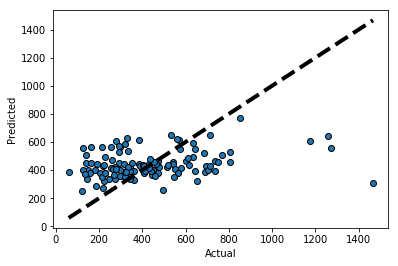

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 932.1056352711748 seconds
MOST IMPORTANT FEATURES:
ne 687.288891242
dog 589.69801691
new south -576.928714447
tonight 469.718855384
use 427.997097119
i'm 392.272288691
sydney 386.573609332
peopl 369.710996905
#ausvot -304.016328425
beach -228.603369023
byron 216.559366525
#sydney 177.986786433
bu 155.186773356
#nswrf -127.362944348
#nswrf #grassfir -123.986434747
mountain -102.514402568
😘 -79.5927031189
2016 -78.0977737494
advic bush 76.2234014133
nsw -70.7651089301
R2: -0.0375875186833
RMSE: 294.589199535
MAPE: 45.0321880416
Mean APE Baseline: 50.564378615


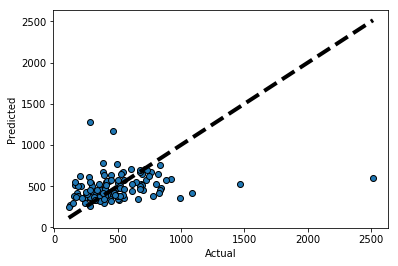

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 965.9035830269568 seconds
MOST IMPORTANT FEATURES:
thi -141.684532998
nsw 119.432964705
sydney -109.933994579
#sydney -29.5324539489
degc 25.8161975564
😂 24.1237538813
beach -20.3533868648
park -17.7177677904
#nsw -15.9373210773
love 7.28052904462
bu -6.16675207228
😘 0.0
fun 0.0
good 0.0
god 0.0
girl 0.0
game 0.0
friend 0.0
fuck 0.0
got 0.0
R2: 0.116414505276
RMSE: 87.7494437066
MAPE: 46.8638032553
Mean APE Baseline: 53.0821806583


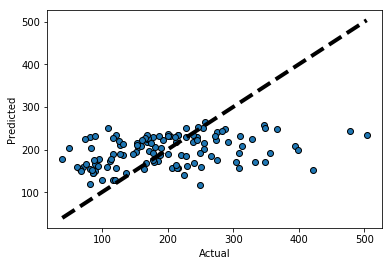

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...


/Users/richardnichol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 951.4997615560424 seconds
MOST IMPORTANT FEATURES:
#grassfir #nswfire 4721.03201395
st 3388.74937163
dec 2016 1942.01871141
bush 1805.29684664
#nswrf -1575.60445343
#nswfire advic -1280.28347144
love 1270.07585423
rd -1092.63887306
light 895.017084121
nov 2016 890.606825272
sep 2016 -881.501948614
point -871.722675467
look -811.471066344
night 775.549377496
road -770.446962822
#grassfir 734.695210694
i'm 694.693561517
just post photo 604.713005816
#nswrf #grassfir -602.768176101
degc 588.600260345
R2: 0.183308574399
RMSE: 517.705783775
MAPE: 44.4557810987
Mean APE Baseline: 53.4238936165


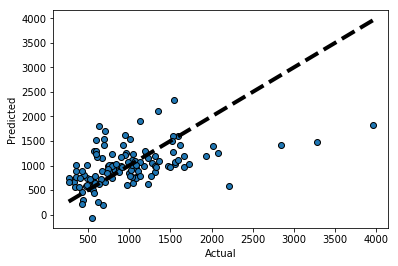

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 968.5456985151395 seconds
MOST IMPORTANT FEATURES:
st 380.018430275
nsw 278.836793703
#grassfir #nswfire 176.305365699
#sydney -174.046878114
beach -156.171847098
just -149.32044073
#ausvot 148.845782742
#qanda 125.579755418
grass 69.1966049307
sydney -59.0592314426
wagga 41.7412213248
m1 -34.5322186585
#nswfire 26.3640670255
thi -26.0188978866
bu -17.0676852082
day -14.2818676063
park -9.1467236736
😂 7.97732852002
ne -2.69506591741
😘 0.0
R2: 0.242051138696
RMSE: 129.862481025
MAPE: 85.4089484657
Mean APE Baseline: 126.659859832


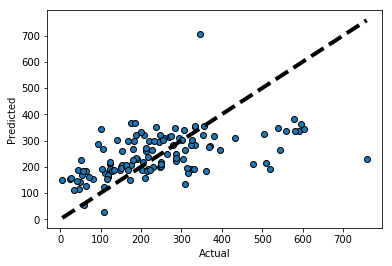

In [26]:
tfidf_output = pd.DataFrame()
print('MODEL=LASSO, MAX FEATURES=500, ALPHA=1')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=500, folds=5, alpha=1)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [ ]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_2016_lasso_preds.csv",index=False)